# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = \
cifar100.load_data()

In [3]:
print(f'Length of train:{len(x_img_train)}')
print(f'Length of test:{len(x_img_test)}')

Length of train:50000
Length of test:10000


In [4]:
print(f'Shape of x_img_train:{x_img_train.shape}')
print(f'Shape of x_img_test:{x_img_test.shape}')
print(f'Shape of y_label_train:{y_label_train.shape}')
print(f'Shape of y_label_test:{y_label_test.shape}')

Shape of x_img_train:(50000, 32, 32, 3)
Shape of x_img_test:(10000, 32, 32, 3)
Shape of y_label_train:(50000, 1)
Shape of y_label_test:(10000, 1)


In [5]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        title=str(i)+','+ 'Label_No.' + str(labels[i][0])
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

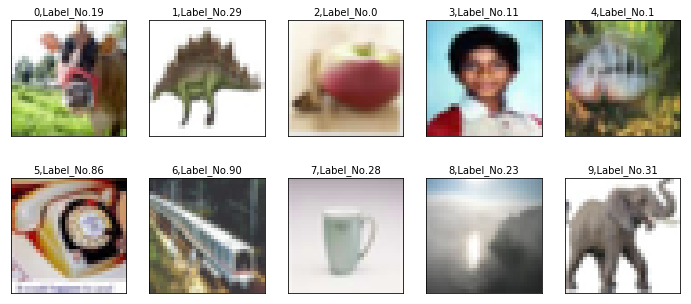

In [6]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [7]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [8]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [9]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [10]:
print("Original train label:")
y_label_train[:5]

Original train label:


array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [11]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [12]:
print(f'Shape of y_label_train_OneHot:{y_label_train_OneHot.shape}')

Shape of y_label_train_OneHot:(50000, 100)


In [13]:
print("One Hot Encoding train label:")
y_label_train_OneHot[:5]

One Hot Encoding train label:


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.